In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import qiskit.quantum_info as qi
import random

In [2]:
simulador_aer = AerSimulator()

In [3]:
n=4

In [4]:
#escolha estre uma funcao balanceada ou constante
list = ['balanced', 'constant']
case = random.choice(list)

In [5]:
def dj_oracle(case,n):
    oracle_qc = QuantumCircuit(n+1)
    if case == "constant":   #O oraculo para quando f(x) é uma função constante é dado pala operação identidade
        for x in range(0,n):
            oracle_qc.id(x)
    
    #Um exemplo de oráculo para quando f(x) é balanceado é dada por (valido para n qubits)
    #(ps. outros oráculos balanceados podem ser introduzidos)
    if case == "balanced":
        #para n=3, f(x=000)=f(x=011)=f(x=110)=f(x=101) = (y=0);
        #          f(x=111)=f(x=100)=f(x=010)=f(x=001) = (y=1);
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

    return oracle_qc

In [6]:
circuit = dj_oracle(case,n) #circuit recebe o circuito do oráculo
gate0 = circuit.to_gate(label="oraculo") 

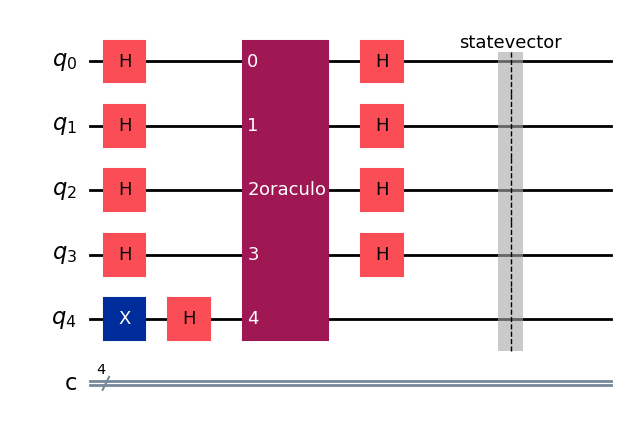

In [7]:
dj_circuit = QuantumCircuit(n+1,n)

#aplica a operacao de Hadamard nos qubits alvos (q0 e q1)
for qubit in range(n):
    dj_circuit.h(qubit)

#coloca o estado inicial do qubit auxiliar (q2) no estado |->     
dj_circuit.x(n)
dj_circuit.h(n)

#adicionando o oráculo
dj_circuit.append(gate0,range(n+1))

#aplica as operações de Hadamard nos qubits alvos
for i in range(n):
    dj_circuit.h(i)
    
dj_circuit.save_statevector()

dj_circuit.draw("mpl")    

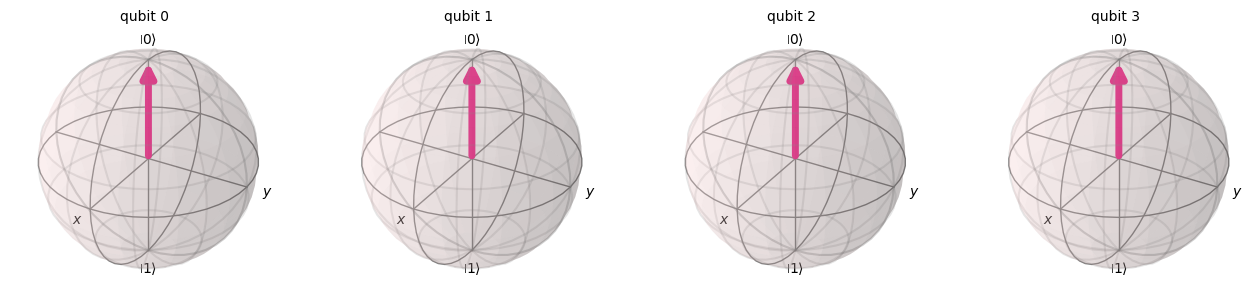

In [11]:
#transpilando o circuito
qc_t = transpile(dj_circuit, backend=simulador_aer) #transpilando
result = simulador_aer.run(qc_t).result() #rodando
svector = result.get_statevector() #salvando o vetor
svectorf = qi.partial_trace(svector,[n]) #corta o ultimo qubit e olha apenas para o estado dos anteriores
plot_bloch_multivector(svectorf) #plota

In [9]:
case

'constant'